In [ ]:
!pip install pandas scikit-learn matplotlib

Accuracy on Training Set: 0.96
Classification Report:
               precision    recall  f1-score   support

       خبریں       0.99      0.98      0.98      5167
       دوہڑا       0.91      0.92      0.91      1790
         غزل       0.93      0.91      0.92      1847
       کالمز       0.95      0.98      0.97      2554

    accuracy                           0.96     11358
   macro avg       0.94      0.95      0.95     11358
weighted avg       0.96      0.96      0.96     11358

Confusion Matrix:
 [[5048    0    0  119]
 [   5 1643  131   11]
 [   2  159 1678    8]
 [  36    3    0 2515]]


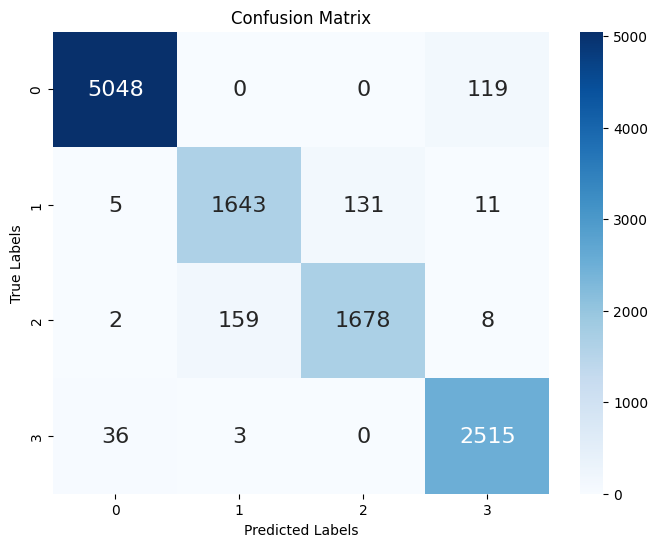

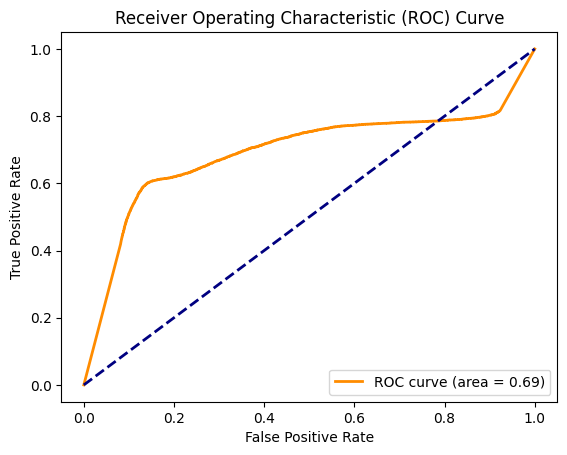

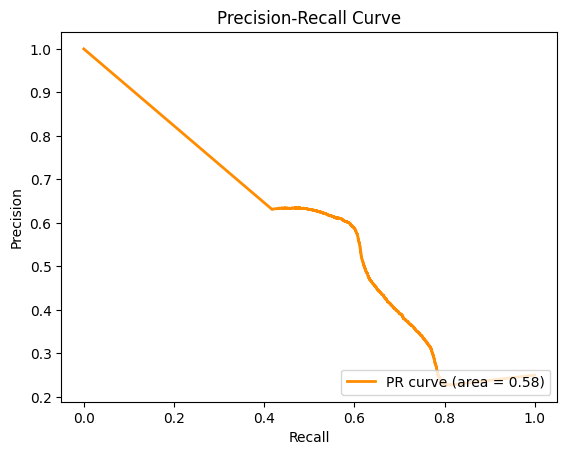

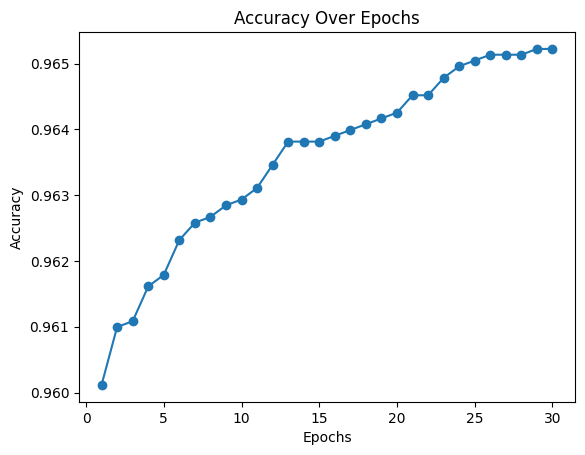

Predictions for New Data:
Text: حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے, Predicted Category: دوہڑا


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Import the files module from google.colab

# Load your data
file_path = 'full_merged_file.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path)

# Assuming you have a column 'Description' containing the text data and a column 'Category' with multiple classes
X = df['Description'].fillna('')  # Replace NaN values with an empty string
y = df['Category']

# Binarize the labels for a multiclass problem
y_binary = label_binarize(y, classes=df['Category'].unique())

# Vectorize the text data (convert text to numerical features)
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_vec, y)

# Save the trained model using joblib
model_filename = 'naive_bayes_model.joblib'
joblib.dump(classifier, model_filename)

# Predictions on the test set
y_pred = classifier.predict(X_vec)

# Evaluate the classifier on the training set (you might want to split into train/test for a more meaningful evaluation)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy on Training Set: {accuracy:.2f}')

# Classification report
print('Classification Report:\n', classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
y_prob = classifier.predict_proba(X_vec)
fpr, tpr, _ = roc_curve(y_binary.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_binary.ravel(), y_prob.ravel())
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy and Loss Graphs
epochs = 30
losses = []

for epoch in range(epochs):
    classifier.partial_fit(X_vec, y, classes=df['Category'].unique())
    y_pred = classifier.predict(X_vec)
    losses.append(accuracy_score(y, y_pred))

plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.show()

# New Data for Prediction
new_data = ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_vec = vectorizer.transform(new_data)

# Predictions on the new data
new_data_pred = classifier.predict(new_data_vec)

# Print predictions for the new data
print('Predictions for New Data:')
for text, pred in zip(new_data, new_data_pred):
    print(f'Text: {text}, Predicted Category: {pred}')

# Download the model file
files.download(model_filename)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Accuracy on Training Set (Polynomial SVM): 0.74
Classification Report (Polynomial SVM):
               precision    recall  f1-score   support

       خبریں       0.93      0.86      0.89      4107
       دوہڑا       0.48      0.48      0.48      1442
         غزل       0.56      0.47      0.51      1488
       کالمز       0.70      0.90      0.79      2049

    accuracy                           0.74      9086
   macro avg       0.67      0.68      0.67      9086
weighted avg       0.75      0.74      0.74      9086



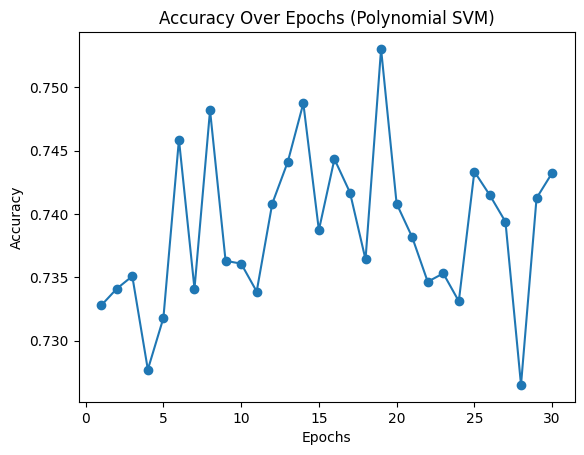

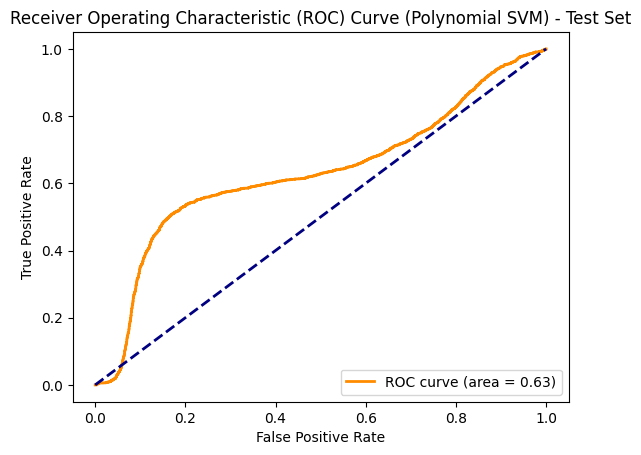

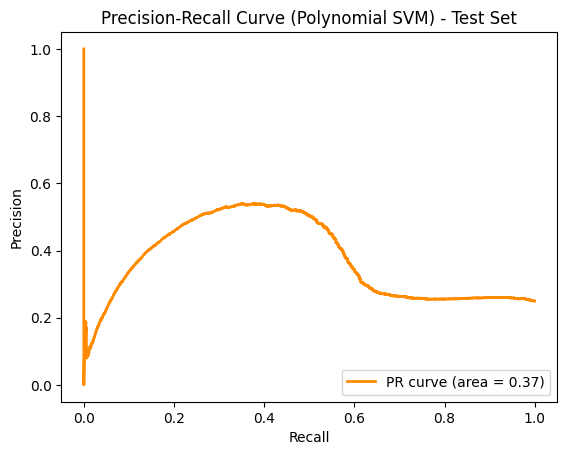

Confusion Matrix (Polynomial SVM) - Test Set:
 [[896  39  15 110]
 [ 14 156 126  52]
 [ 20 124 156  59]
 [ 37  12   8 448]]


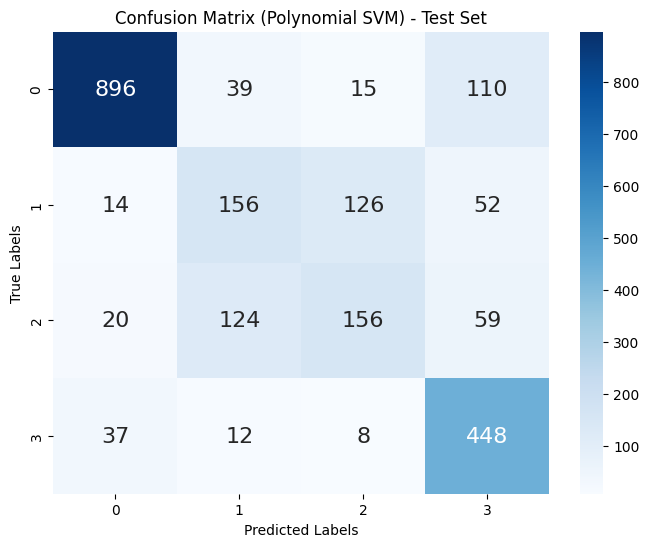

Predictions for New Data (Polynomial SVM - SGDClassifier):
Text: حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے, Predicted Category: غزل


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load your data
file_path = 'full_merged_file.xlsx'
df = pd.read_excel(file_path)

X = df['Description'].fillna('')
y = df['Category']

# Binarize the labels for a multiclass problem
y_binary = label_binarize(y, classes=df['Category'].unique())

# Vectorize the text data
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Create a pipeline with a polynomial SVM classifier using SGDClassifier
poly_sgd_classifier = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(loss='log', max_iter=1000, tol=1e-3))

# Train the SVM model on the training set using partial_fit
epochs = 30
batch_size = 1000
total_train_samples = X_train.shape[0]
num_train_batches = total_train_samples // batch_size

losses_poly_sgd = []

for epoch in range(epochs):
    for i in range(num_train_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size if i < num_train_batches - 1 else total_train_samples

        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        # Check the number of unique classes in the batch
        num_classes_in_batch = len(pd.unique(y_batch))
        if num_classes_in_batch > 1:
            poly_sgd_classifier.fit(X_batch, y_batch)

    # Predictions on the full training set after each epoch
    y_pred_train_poly_sgd = poly_sgd_classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train_poly_sgd)
    losses_poly_sgd.append(accuracy_train)

# Evaluate the classifier on the training set
accuracy_poly_svm = accuracy_score(y_train, y_pred_train_poly_sgd)
print(f'Accuracy on Training Set (Polynomial SVM): {accuracy_poly_svm:.2f}')

# Classification report
print('Classification Report (Polynomial SVM):\n', classification_report(y_train, y_pred_train_poly_sgd))

# Accuracy and Loss Graphs
plt.figure()
plt.plot(range(1, epochs + 1), losses_poly_sgd, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs (Polynomial SVM)')
plt.show()

# Predictions on the test set after training
y_prob_test_poly_sgd = poly_sgd_classifier.decision_function(X_test)

# ROC Curve for the test set
fpr_test_poly_sgd, tpr_test_poly_sgd, _ = roc_curve(label_binarize(y_test, classes=df['Category'].unique()).ravel(), y_prob_test_poly_sgd.ravel())
roc_auc_test_poly_sgd = auc(fpr_test_poly_sgd, tpr_test_poly_sgd)

# Plot ROC Curve for the test set
plt.figure()
plt.plot(fpr_test_poly_sgd, tpr_test_poly_sgd, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test_poly_sgd))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Polynomial SVM) - Test Set')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve for the test set
precision_test_poly_sgd, recall_test_poly_sgd, _ = precision_recall_curve(label_binarize(y_test, classes=df['Category'].unique()).ravel(), y_prob_test_poly_sgd.ravel())
pr_auc_test_poly_sgd = auc(recall_test_poly_sgd, precision_test_poly_sgd)

# Plot Precision-Recall Curve for the test set
plt.figure()
plt.plot(recall_test_poly_sgd, precision_test_poly_sgd, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc_test_poly_sgd))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Polynomial SVM) - Test Set')
plt.legend(loc='lower right')
plt.show()

# Confusion matrix for the test set
conf_matrix_test_poly_sgd = confusion_matrix(y_test, poly_sgd_classifier.predict(X_test))
print('Confusion Matrix (Polynomial SVM) - Test Set:\n', conf_matrix_test_poly_sgd)

# Plot confusion matrix as a heatmap for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_poly_sgd, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix (Polynomial SVM) - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# New Data for Prediction
new_data = ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_vec = vectorizer.transform(new_data)

# Predictions on the new data using Polynomial SVM (SGDClassifier)
new_data_pred_poly_sgd = poly_sgd_classifier.predict(new_data_vec)

# Print predictions for the new data
print('Predictions for New Data (Polynomial SVM - SGDClassifier):')
for text, pred in zip(new_data, new_data_pred_poly_sgd):
    print(f'Text: {text}, Predicted Category: {pred}')

# Download the polynomial SVM (SGDClassifier) model file
poly_sgd_model_filename = 'poly_sgd_model.joblib'
joblib.dump(poly_sgd_classifier, poly_sgd_model_filename)
files.download(poly_sgd_model_filename)


Confusion Matrix (KNN) - Test Set:
 [[118 932   0  10]
 [  0 328  20   0]
 [  0 337  22   0]
 [  0 215   0 290]]


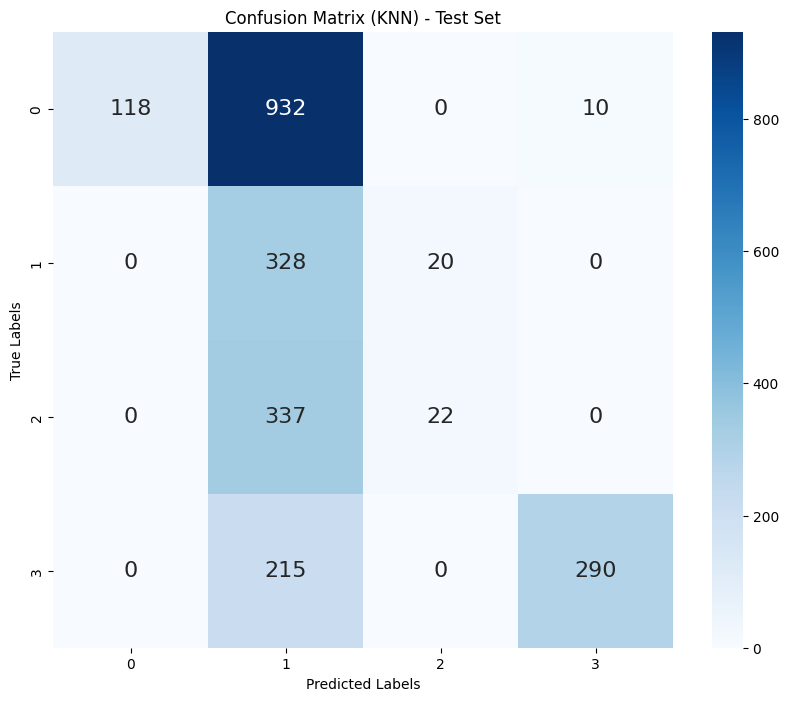

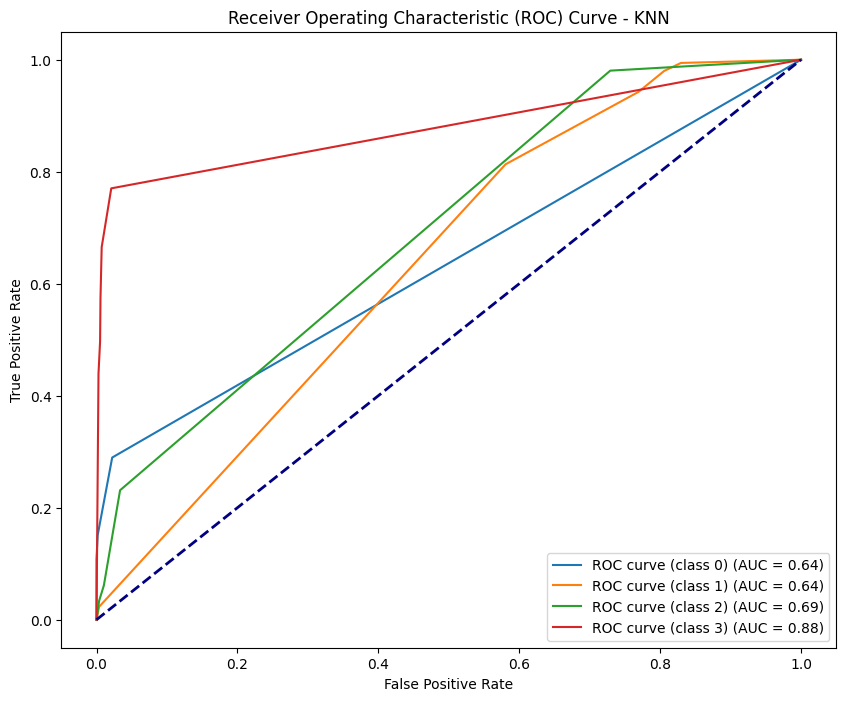

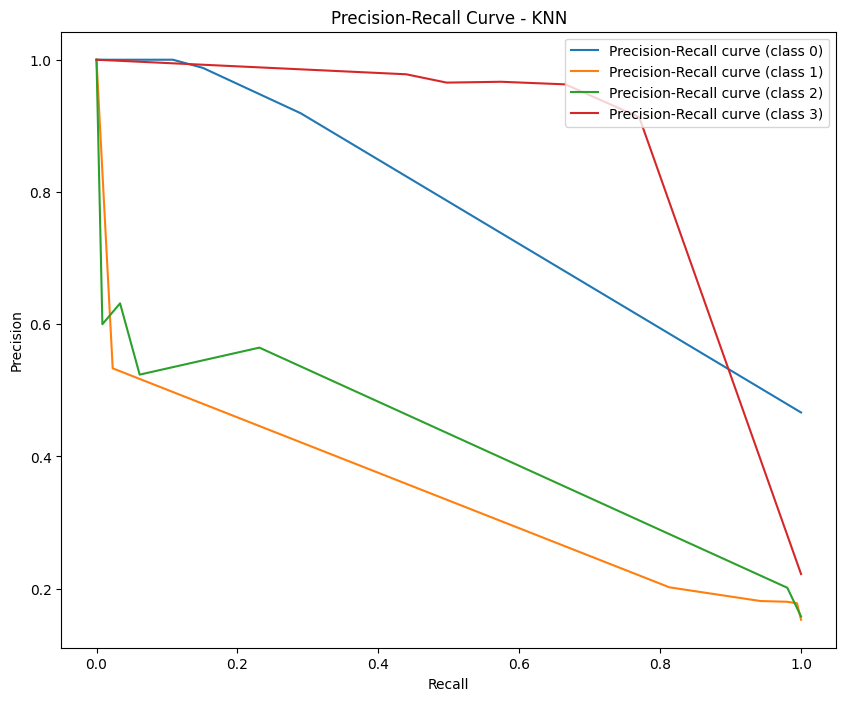

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your data
file_path = 'full_merged_file.xlsx'
df = pd.read_excel(file_path)

X = df['Description'].fillna('')
y = df['Category']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_prob_test_knn = knn_classifier.predict_proba(X_test)

# Confusion matrix for the test set
conf_matrix_test_knn = confusion_matrix(y_test, knn_classifier.predict(X_test))
print('Confusion Matrix (KNN) - Test Set:\n', conf_matrix_test_knn)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix (KNN) - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(knn_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == knn_classifier.classes_[i], y_prob_test_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(knn_classifier.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == knn_classifier.classes_[i], y_prob_test_knn[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve (class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend(loc='upper right')
plt.show()

# Confusion matrix for the test set
conf_matrix_test_knn = confusion_matrix(y_test, knn_classifier.predict(X_test))
print('Confusion Matrix (KNN) - Test Set:\n', conf_matrix_test_knn)

# Classification report
print('Classification Report (KNN):\n', classification_report(y_test, knn_classifier.predict(X_test)))

# Accuracy on the test set
accuracy_test_knn = accuracy_score(y_test, knn_classifier.predict(X_test))
print(f'Accuracy on Test Set (KNN): {accuracy_test_knn:.2f}')

# Predictions on the new data using KNN
new_data_knn =  ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_tfidf_knn = tfidf_vectorizer.transform(new_data_knn)

# Predictions on the new data using KNN
new_data_pred_knn = knn_classifier.predict(new_data_tfidf_knn)

# Print predictions for the new data
print('Predictions for New Data (KNN):', new_data_pred_knn)

# Download the KNN model file
knn_model_filename = 'knn_model.joblib'
joblib.dump(knn_classifier, knn_model_filename)


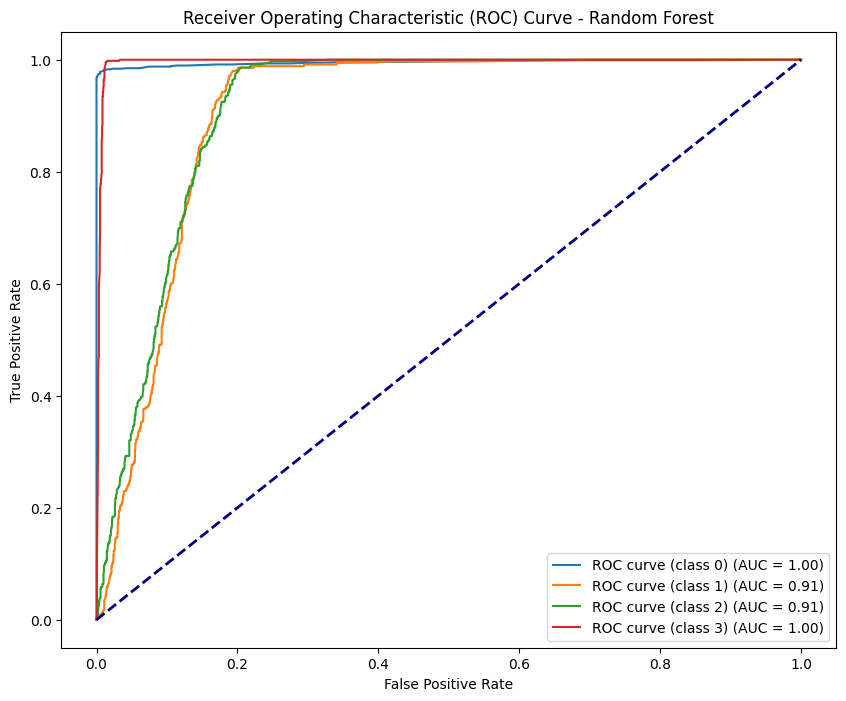

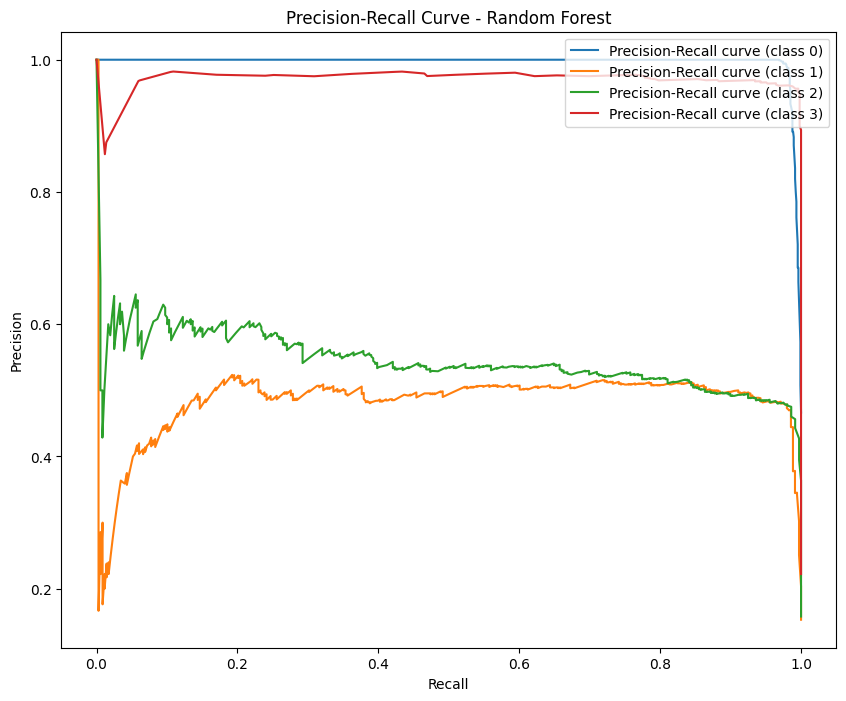

Confusion Matrix (Random Forest) - Test Set:
 [[1041    0    2   17]
 [   2  159  187    0]
 [   4  151  204    0]
 [  15    0    0  490]]


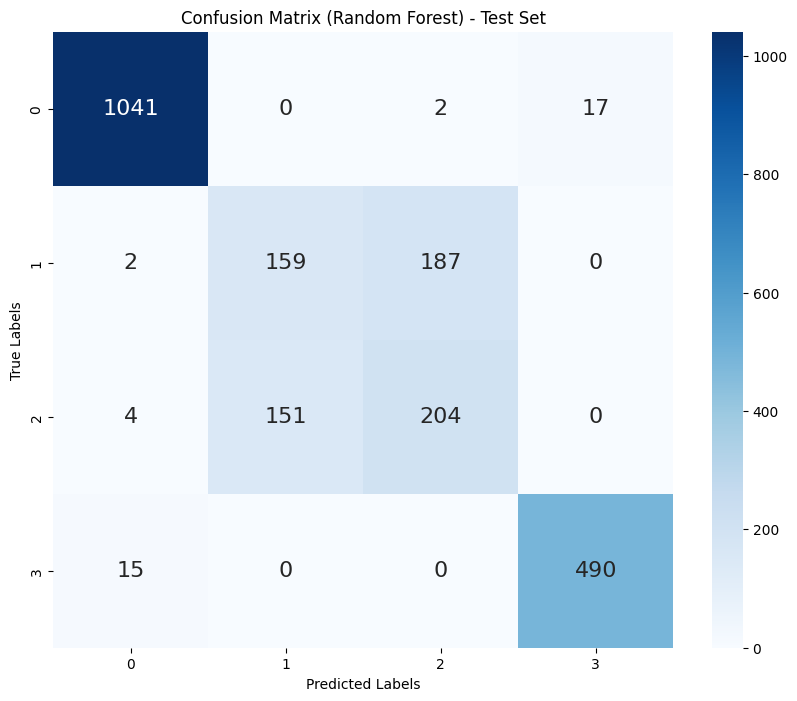

Classification Report (Random Forest):
               precision    recall  f1-score   support

       خبریں       0.98      0.98      0.98      1060
       دوہڑا       0.51      0.46      0.48       348
         غزل       0.52      0.57      0.54       359
       کالمز       0.97      0.97      0.97       505

    accuracy                           0.83      2272
   macro avg       0.74      0.74      0.74      2272
weighted avg       0.83      0.83      0.83      2272

Accuracy on Test Set (Random Forest): 0.83
Predictions for New Data (Random Forest): ['دوہڑا']


['rf_model.joblib']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your data
file_path = 'full_merged_file.xlsx'
df = pd.read_excel(file_path)

X = df['Description'].fillna('')
y = df['Category']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_prob_test_rf = rf_classifier.predict_proba(X_test)

# Plot ROC Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(rf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf_classifier.classes_[i], y_prob_test_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(rf_classifier.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == rf_classifier.classes_[i], y_prob_test_rf[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve (class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='upper right')
plt.show()

# Confusion matrix for the test set
conf_matrix_test_rf = confusion_matrix(y_test, rf_classifier.predict(X_test))
print('Confusion Matrix (Random Forest) - Test Set:\n', conf_matrix_test_rf)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix (Random Forest) - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print('Classification Report (Random Forest):\n', classification_report(y_test, rf_classifier.predict(X_test)))

# Accuracy on the test set
accuracy_test_rf = accuracy_score(y_test, rf_classifier.predict(X_test))
print(f'Accuracy on Test Set (Random Forest): {accuracy_test_rf:.2f}')

# Predictions on the new data using Random Forest
new_data_rf =  ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_tfidf_rf = tfidf_vectorizer.transform(new_data_rf)

# Predictions on the new data using Random Forest
new_data_pred_rf = rf_classifier.predict(new_data_tfidf_rf)

# Print predictions for the new data
print('Predictions for New Data (Random Forest):', new_data_pred_rf)

# Download the Random Forest model file
rf_model_filename = 'rf_model.joblib'
joblib.dump(rf_classifier, rf_model_filename)


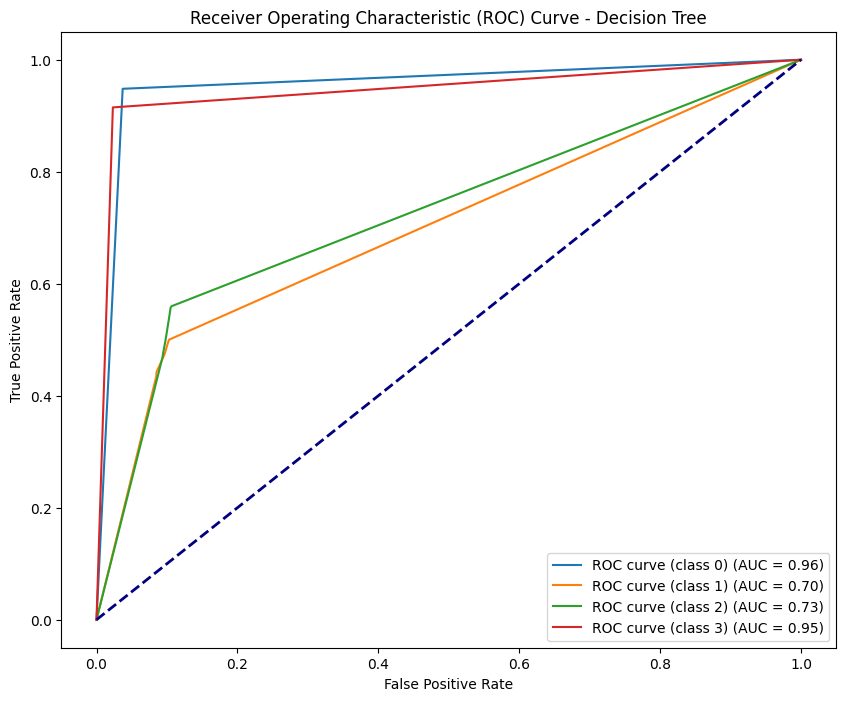

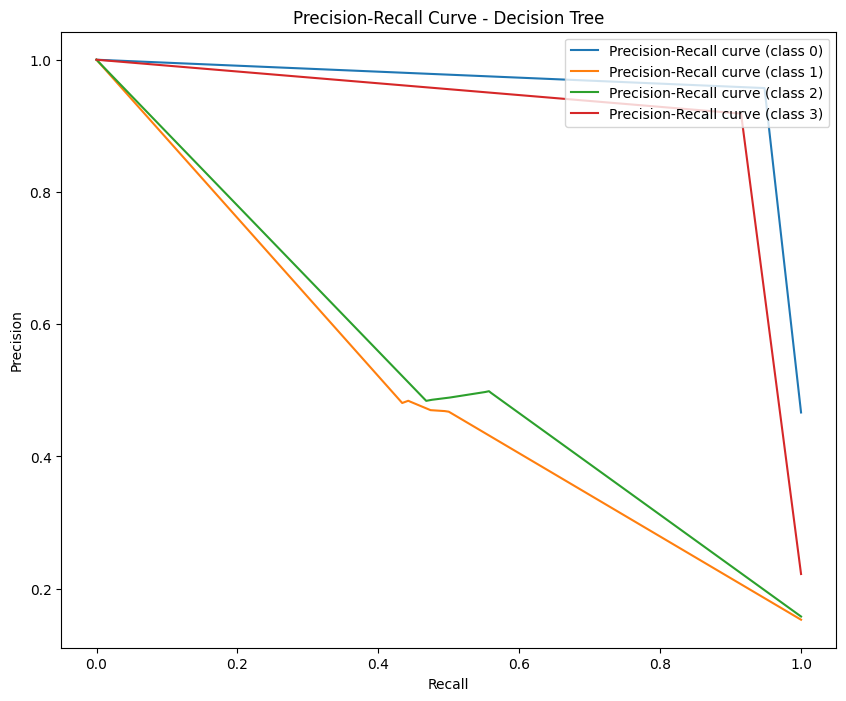

Confusion Matrix (Decision Tree) - Test Set:
 [[1005   10   10   35]
 [   8  165  173    2]
 [   5  170  180    4]
 [  32    6    5  462]]


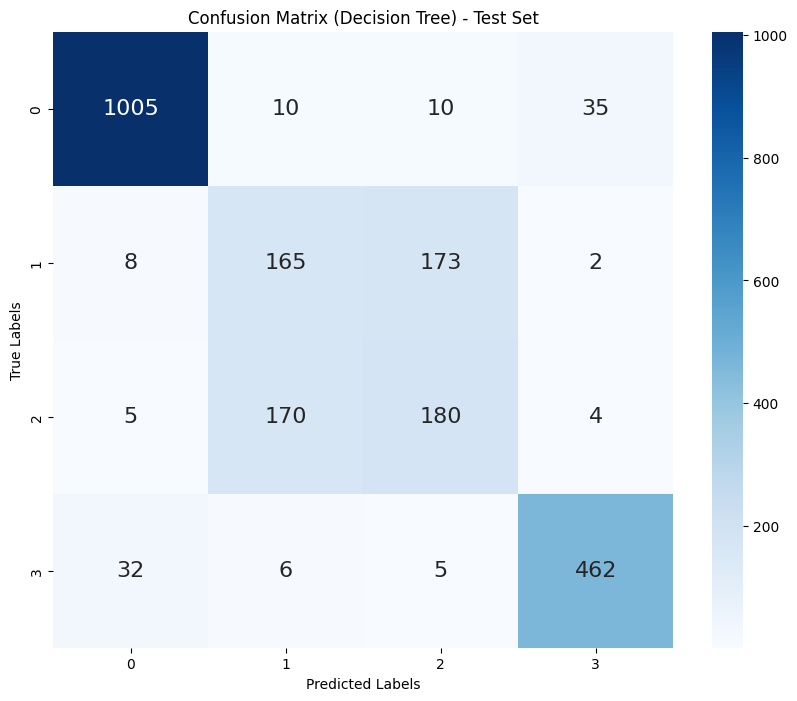

Classification Report (Decision Tree):
               precision    recall  f1-score   support

       خبریں       0.96      0.95      0.95      1060
       دوہڑا       0.47      0.47      0.47       348
         غزل       0.49      0.50      0.50       359
       کالمز       0.92      0.91      0.92       505

    accuracy                           0.80      2272
   macro avg       0.71      0.71      0.71      2272
weighted avg       0.80      0.80      0.80      2272

Accuracy on Test Set (Decision Tree): 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Matplotlib currently does not support Arabic natively.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabt

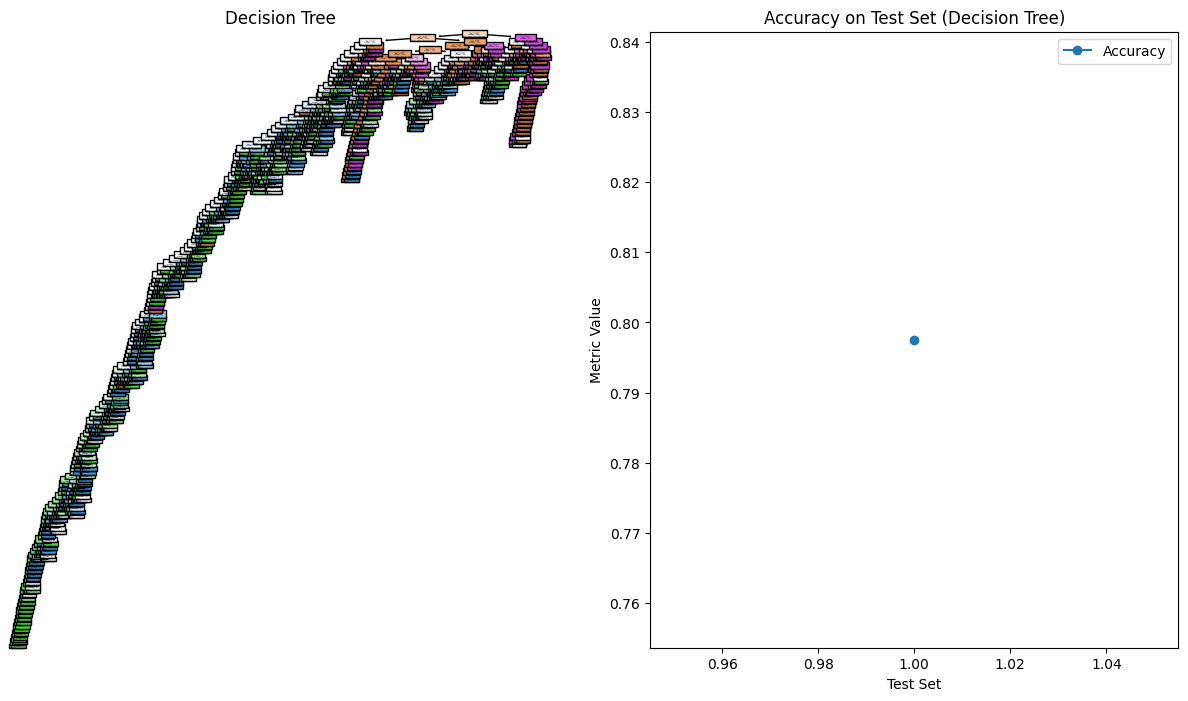

Predictions for New Data (Decision Tree): ['غزل']


['dt_model.joblib']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your data
file_path = 'full_merged_file.xlsx'
df = pd.read_excel(file_path)

X = df['Description'].fillna('')
y = df['Category']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_prob_test_dt = dt_classifier.predict_proba(X_test)

# Plot ROC Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(dt_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == dt_classifier.classes_[i], y_prob_test_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(dt_classifier.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == dt_classifier.classes_[i], y_prob_test_dt[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve (class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='upper right')
plt.show()

# Confusion matrix for the test set
conf_matrix_test_dt = confusion_matrix(y_test, dt_classifier.predict(X_test))
print('Confusion Matrix (Decision Tree) - Test Set:\n', conf_matrix_test_dt)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test_dt, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix (Decision Tree) - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print('Classification Report (Decision Tree):\n', classification_report(y_test, dt_classifier.predict(X_test)))

# Accuracy on the test set
accuracy_test_dt = accuracy_score(y_test, dt_classifier.predict(X_test))
print(f'Accuracy on Test Set (Decision Tree): {accuracy_test_dt:.2f}')

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plot_tree(dt_classifier, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out())
plt.title('Decision Tree')

plt.subplot(1, 2, 2)
plt.plot([1], [accuracy_test_dt], marker='o', label='Accuracy')
plt.xlabel('Test Set')
plt.ylabel('Metric Value')
plt.title('Accuracy on Test Set (Decision Tree)')
plt.legend()
plt.show()

# Predictions on the new data
new_data_dt =  ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_tfidf_dt = tfidf_vectorizer.transform(new_data_dt)

# Predictions on the new data
new_data_pred_dt = dt_classifier.predict(new_data_tfidf_dt)

# Print predictions for the new data
print('Predictions for New Data (Decision Tree):', new_data_pred_dt)

# Download the Decision Tree model file
dt_model_filename = 'dt_model.joblib'
joblib.dump(dt_classifier, dt_model_filename)


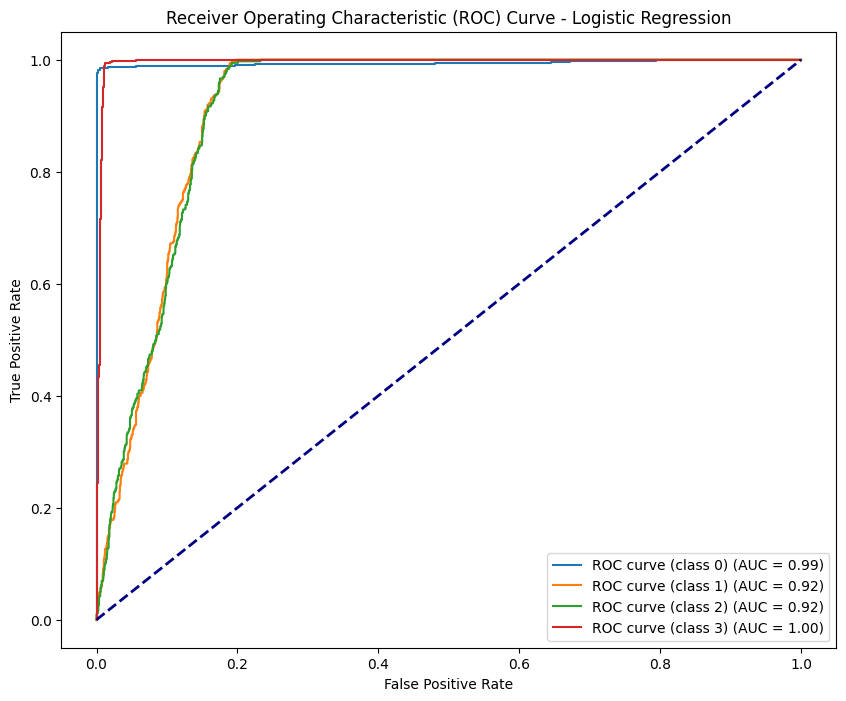

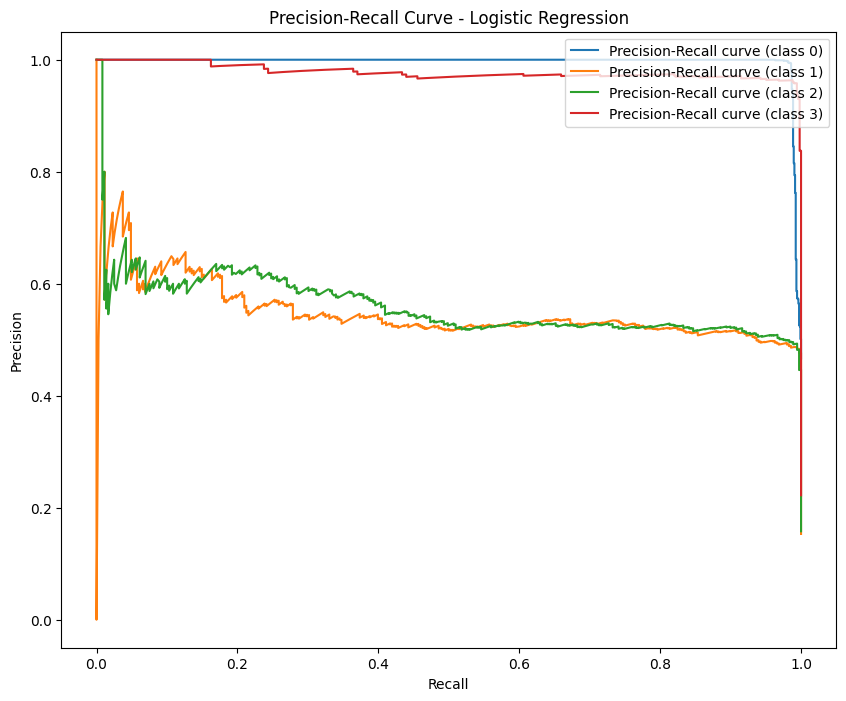

Confusion Matrix (Logistic Regression) - Test Set:
 [[1044    0    0   16]
 [   0  165  183    0]
 [   0  160  197    2]
 [   6    2    3  494]]


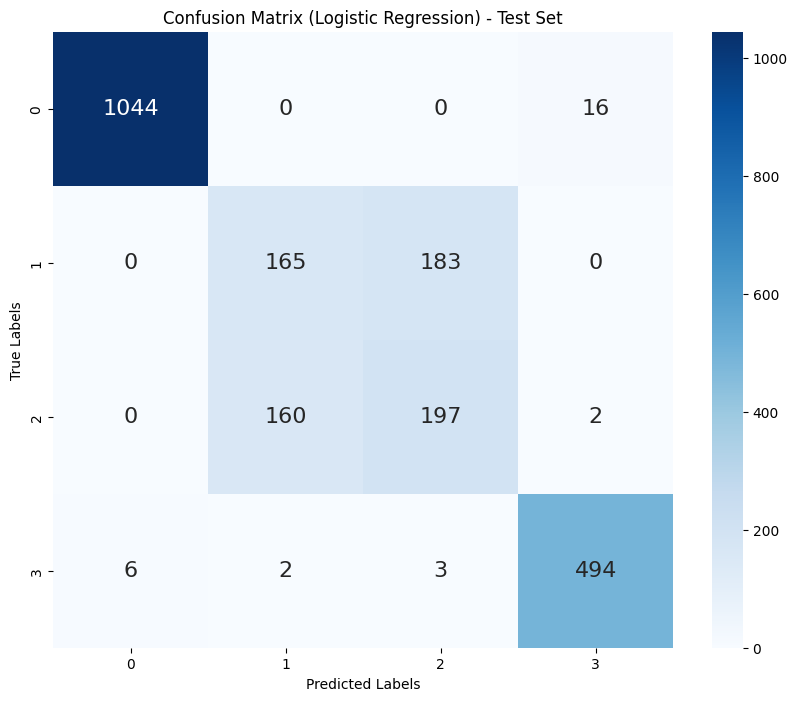

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

       خبریں       0.99      0.98      0.99      1060
       دوہڑا       0.50      0.47      0.49       348
         غزل       0.51      0.55      0.53       359
       کالمز       0.96      0.98      0.97       505

    accuracy                           0.84      2272
   macro avg       0.74      0.75      0.75      2272
weighted avg       0.84      0.84      0.84      2272



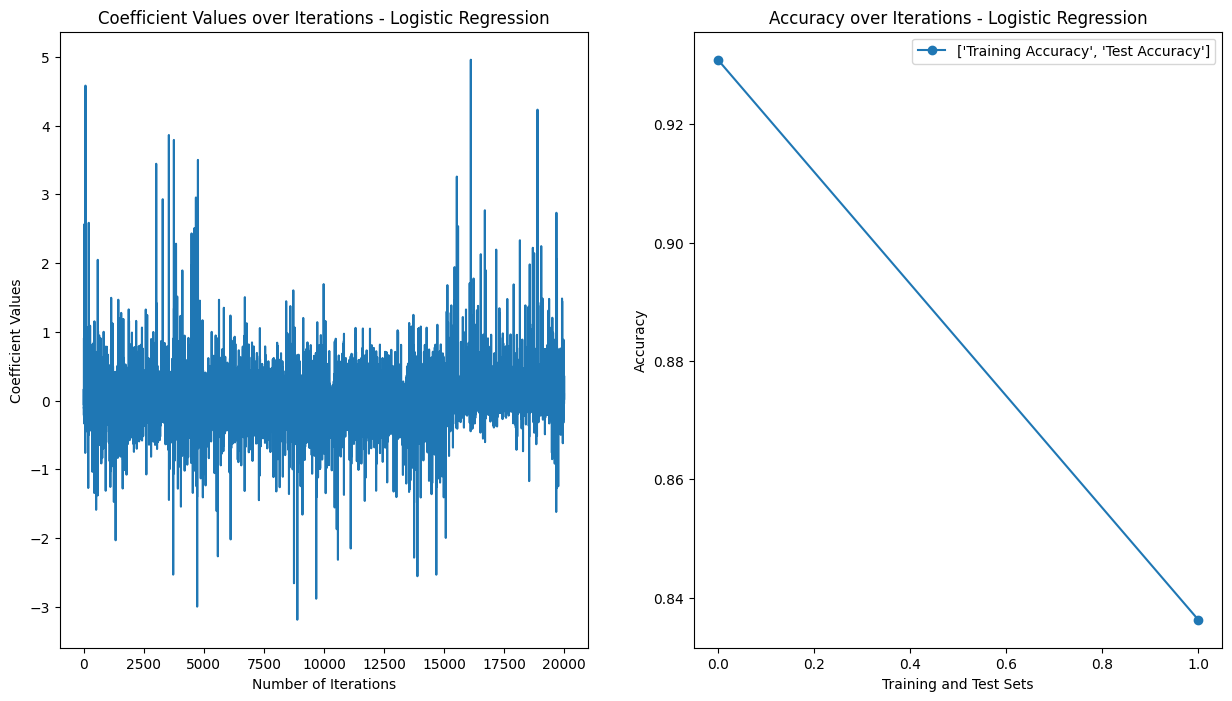

Predictions for New Data (Logistic Regression): ['دوہڑا']


['lr_model.joblib']

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your data
file_path = 'full_merged_file.xlsx'
df = pd.read_excel(file_path)

X = df['Description'].fillna('')
y = df['Category']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Predictions on the test set
y_prob_test_lr = lr_classifier.predict_proba(X_test)

# Plot ROC Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(lr_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == lr_classifier.classes_[i], y_prob_test_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(lr_classifier.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == lr_classifier.classes_[i], y_prob_test_lr[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve (class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='upper right')
plt.show()

# Confusion matrix for the test set
conf_matrix_test_lr = confusion_matrix(y_test, lr_classifier.predict(X_test))
print('Confusion Matrix (Logistic Regression) - Test Set:\n', conf_matrix_test_lr)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test_lr, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix (Logistic Regression) - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print('Classification Report (Logistic Regression):\n', classification_report(y_test, lr_classifier.predict(X_test)))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(lr_classifier.coef_.flatten())  # You can customize this to your needs
plt.xlabel('Number of Iterations')
plt.ylabel('Coefficient Values')
plt.title('Coefficient Values over Iterations - Logistic Regression')

plt.subplot(1, 2, 2)
accuracy_train_lr = accuracy_score(y_train, lr_classifier.predict(X_train))
accuracy_test_lr = accuracy_score(y_test, lr_classifier.predict(X_test))
plt.plot([0, 1], [accuracy_train_lr, accuracy_test_lr], marker='o', label=['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Training and Test Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations - Logistic Regression')
plt.legend()
plt.show()

# Predictions on the new data
new_data_lr = ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_tfidf_lr = tfidf_vectorizer.transform(new_data_lr)

# Predictions on the new data
new_data_pred_lr = lr_classifier.predict(new_data_tfidf_lr)

# Print predictions for the new data
print('Predictions for New Data (Logistic Regression):', new_data_pred_lr)

# Download the Logistic Regression model file
lr_model_filename = 'lr_model.joblib'
joblib.dump(lr_classifier, lr_model_filename)
